<a href="https://colab.research.google.com/github/nitingarg2015/EVA8/blob/master/Assignment%2012/Object%20detection%20using%20OpenCV/object_detection_with_opencv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np

In [2]:
!wget "https://pjreddie.com/media/files/yolov3.weights"

!wget "https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg"

!wget "https://raw.githubusercontent.com/pjreddie/darknet/master/data/coco.names"

net = cv2.dnn.readNet('yolov3.weights', 'yolov3.cfg')

classes = []

with open('coco.names', 'r') as f:
  classes = [line.strip() for line in f.readlines()]

print(classes)

--2023-03-28 09:41:57--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  40.3MB/s    in 6.3s    

2023-03-28 09:42:04 (37.4 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]

--2023-03-28 09:42:04--  https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8342 (8.1K) [text/plain]
Saving to: ‘yolov3.cfg’

yolov3.cfg          100%[===================>]   8.15K  --.-KB/s    in 0s      


In [3]:
len(classes)

80

In [4]:
# Load Yolo
net = cv2.dnn.readNet("yolov3.cfg", "yolov3.weights")
classes = []
with open("coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]
layer_names = net.getLayerNames()
output_layers = [layer_names[i-1] for i in net.getUnconnectedOutLayers()]

colors = np.random.uniform(0, 255, size=(len(classes), 3))

In [5]:
output_layers

['yolo_82', 'yolo_94', 'yolo_106']

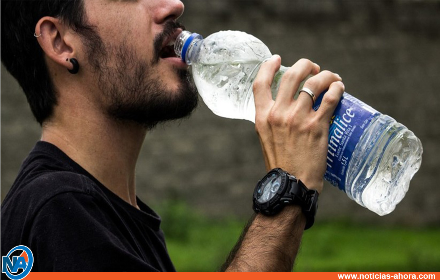

In [7]:
# Loading image
from google.colab.patches import cv2_imshow
img_orig = cv2.imread("person_bottle.jpg")
height, width, channels = img_orig.shape

img = cv2.resize(img_orig, None, fx=0.4, fy=0.4)

cv2_imshow(img)

In [9]:
# Detecting objects
mean = cv2.mean(img)

blob = cv2.dnn.blobFromImage(img, scalefactor = 1./255., size = (416, 416), mean = mean, swapRB = True, crop=False)
net.setInput(blob)
outs = net.forward(output_layers)

#print(outs)

In [10]:
boxes = []
confidences = []
class_ids = []

for out in outs:
  for detection in out:
    scores = detection[5:]
    class_id = np.argmax(scores)
    confidence = scores[class_id]
    if confidence > 0.5:
      center_x = int(detection[0]*width)
      center_y = int(detection[1]* height)
      w = int(detection[2]*width)
      h = int(detection[3]* height)
      
      boxes.append([center_x,center_y,w,h])
      confidences.append(float(confidence))
      class_ids.append(class_id)
      #print("object detected", class_id, confidence, center_x, center_y, w, h)

In [11]:
boxes

[[724, 248, 590, 340],
 [732, 284, 653, 380],
 [728, 301, 591, 530],
 [406, 359, 840, 653],
 [482, 360, 986, 664],
 [527, 357, 1005, 638],
 [736, 347, 585, 589],
 [479, 379, 1007, 642],
 [526, 382, 1028, 614]]

In [ ]:
# # Loading image
# # from google.colab.patches import cv2_imshow
# # img_orig = cv2.imread("person_bottle.jpg")

# font = cv2.FONT_HERSHEY_PLAIN
# print(len(boxes))
# number_objects_detected = len(boxes)
# for i in range(len(boxes)):
#   x,y,w,h = boxes[i]
#   label = str(classes[class_ids[i]])
#   cv2.rectangle(img_orig, (x,y),(x+w, y+h), (0,255,0),2)
#   cv2.putText(img_orig, label,(x,y+30), font,4,(255, 0, 0),2)

# cv2_imshow(img_orig)

[4 1]


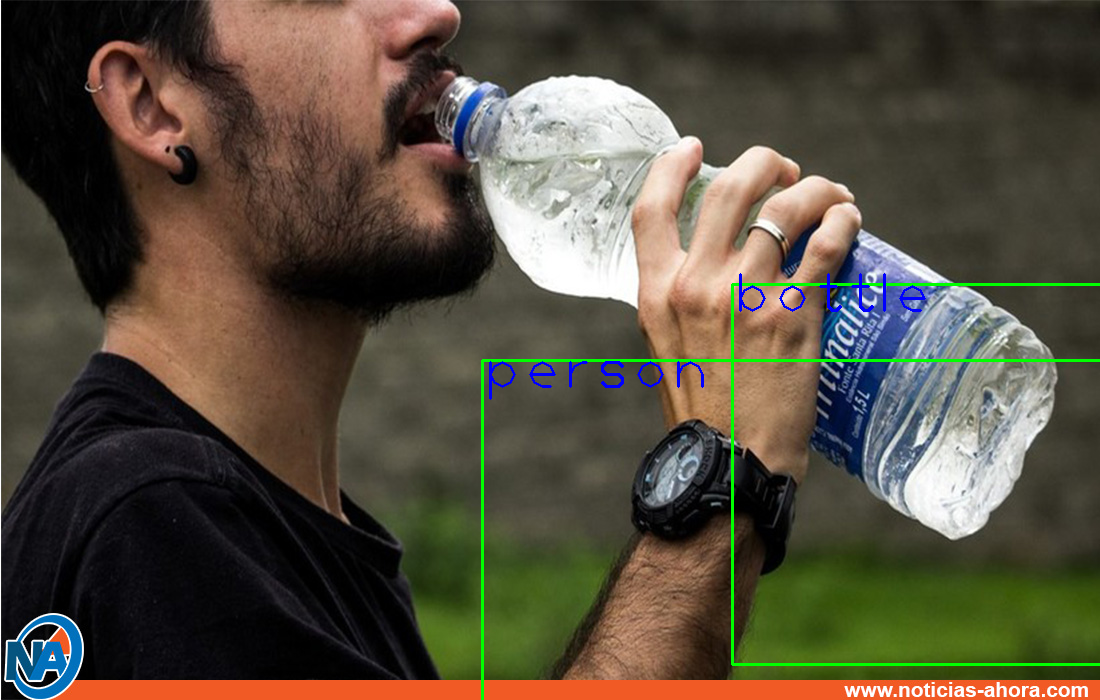

In [12]:
# Loading image
# from google.colab.patches import cv2_imshow
# img_orig = cv2.imread("person_bottle.jpg")

font = cv2.FONT_HERSHEY_PLAIN

indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
print(indexes)

for i in range(len(boxes)):
  if i in indexes:
    x,y,w,h = boxes[i]
    label = str(classes[class_ids[i]])
    cv2.rectangle(img_orig, (x,y),(x+w, y+h), (0,255,0),2)
    cv2.putText(img_orig, label,(x,y+30), font,4,(255, 0, 0),2)

cv2_imshow(img_orig)
